# Machine Learning - Supervised Learning a. Classification 
    • Project: Credit Risk Assessment 
        ○ Skills: Binary classification, model evaluation, handling imbalanced data
        ○ Tools: Scikit-learn, XGBoost, LightGBM


In [6]:
%pip install pandas
import pandas as pd

In [7]:
%pip install matplotlib
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


|Feature Name	               |         Description                                |
|------------------------------|----------------------------------------------------|
|person_age	                   |         Age                                     
|person_income	               |         Annual Income
|person_home_ownership         |         Home ownership
|person_emp_length	           |         Employment length (in years)
|loan_intent	               |         Loan intent
|loan_amnt	                   |         Loan amount
|loan_int_rate	               |         Interest rate
|loan_status	               |         Loan status (0 is non default 1 is default)
|loan_percent_income	       |         Percent income
|cb_person_default_on_file	   |         Historical default
|cb_preson_cred_hist_length	   |         Credit history length

In [8]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
# Cases with persone age above 100 years( very rare cases)
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25


In [11]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [12]:
# incorrect employment length
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [13]:
# incorrect income
df[df['person_income']>1000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,12000,7.51,0,0.01,N,8
29119,36,1200000,OWN,16.0,MEDICAL,10000,6.54,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,10000,NaN,0,0.01,N,16
30049,42,2039784,RENT,0.0,VENTURE,8450,12.29,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,6600,7.74,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,6400,7.40,0,0.00,N,15
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25
32497,63,1782000,RENT,13.0,EDUCATION,12025,14.27,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,1500,NaN,0,0.00,N,21


In [14]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [15]:
df['loan_status'].unique()

array([1, 0])

In [16]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
# removing cases above 100 years
df2 = df[df['person_age']<100]

# removing incorrect employment length
df3 = df2[df2['person_emp_length']<60]

# Remove incorrect income
df4 = df3[df3['person_income']<2000000]

In [18]:
df4

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


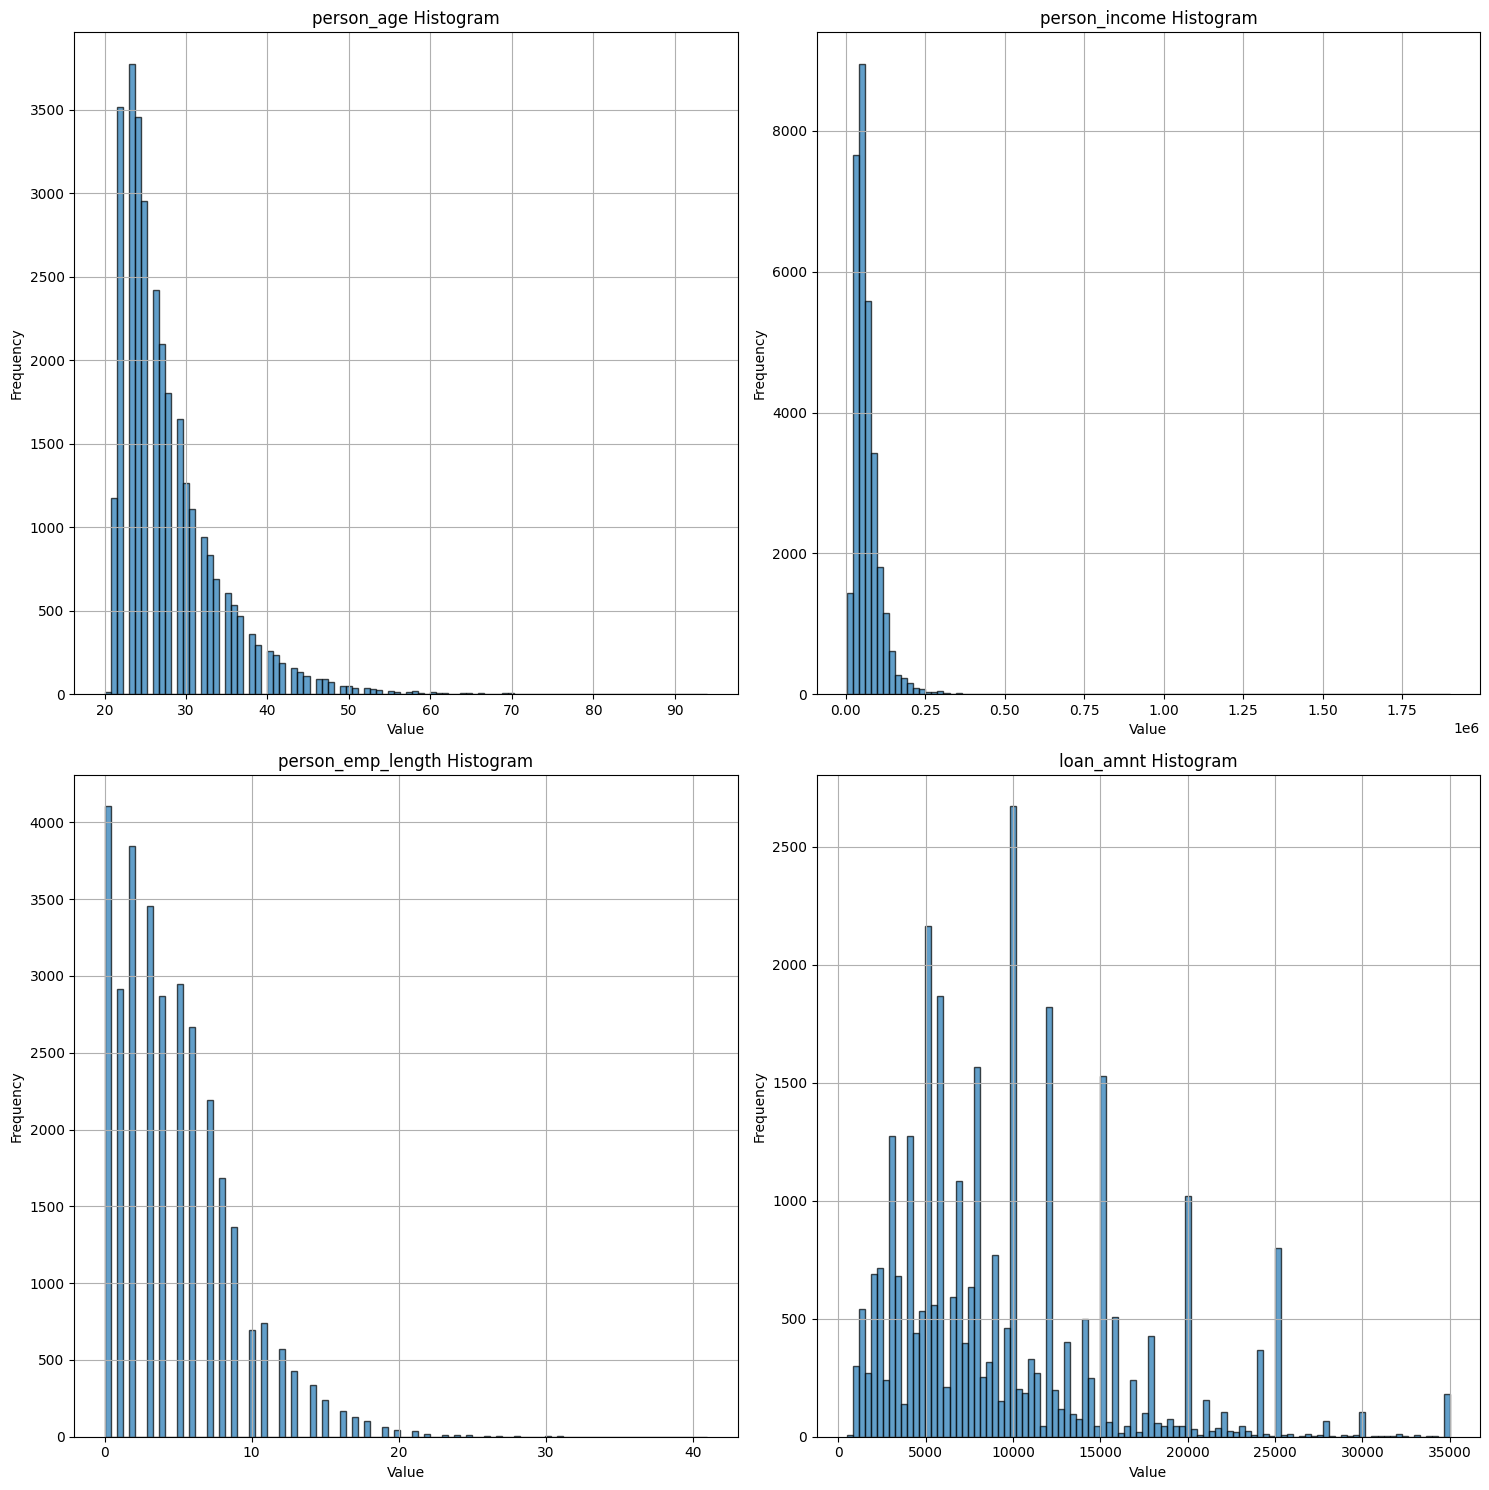

In [19]:
# --- Subplots ---
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# First subplot: Histogram for 'person_age'
axs[0, 0].hist(df4['person_age'], bins=100, edgecolor='black', alpha=0.7)
axs[0, 0].set_title('person_age Histogram')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

# Second subplot: Histogram for 'person_income'
axs[0, 1].hist(df4['person_income'], bins=100, edgecolor='black', alpha=0.7)
axs[0, 1].set_title('person_income Histogram')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Third subplot: You can plot another relevant variable, e.g., 'person_emp_length'
axs[1, 0].hist(df4['person_emp_length'], bins=100, edgecolor='black', alpha=0.7)
axs[1, 0].set_title('person_emp_length Histogram')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Fourth subplot: Another variable, e.g., 'loan_amnt'
axs[1, 1].hist(df4['loan_amnt'], bins=100, edgecolor='black', alpha=0.7)
axs[1, 1].set_title('loan_amnt Histogram')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


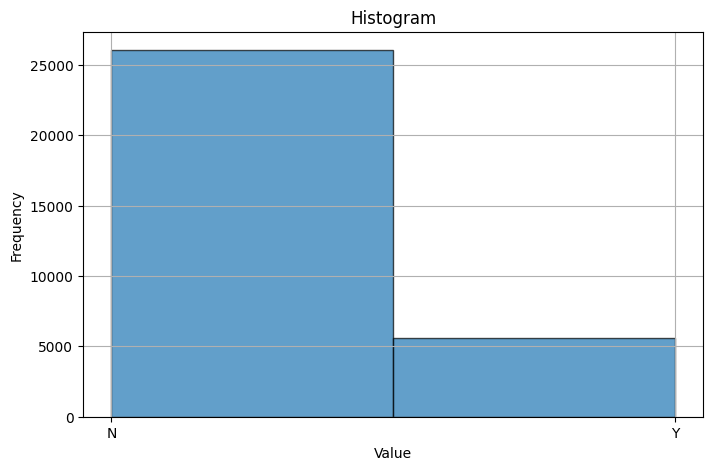

In [20]:
# looking at cb_person_default_on_file
plt.figure(figsize=(8, 5))
plt.hist(df4['cb_person_default_on_file'], bins=2, edgecolor='black', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# Count rows where cb_person_default_on_file == 'Y'
count_Y = df4[df4['cb_person_default_on_file'] == 'Y'].shape[0]

# Count rows where cb_person_default_on_file == 'N'
count_N = df4[df4['cb_person_default_on_file'] == 'N'].shape[0]

print(f"Number of rows with 'Y': {count_Y}")
print(f"Number of rows with 'N': {count_N}")


Number of rows with 'Y': 5627
Number of rows with 'N': 26051


This shows imbalance data. To deal with the imbalance data, we need to use:
- Metrics like Percision, Recall,F1 Score
- Over sampling or under sampling


### Over sampling the 'Y': 5627 Class
Random Oversampling: Randomly duplicate examples in the minority class.

In [22]:
%pip install imblearn
# Import the necessary libraries
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.
